### Нахождение среднего числа передач в алгоритме с ожиданием

![image1.png](./assets/image1.png)

#### Расчет теоретического параметра среднего числа передач
![image2.png](./assets/image2.png)

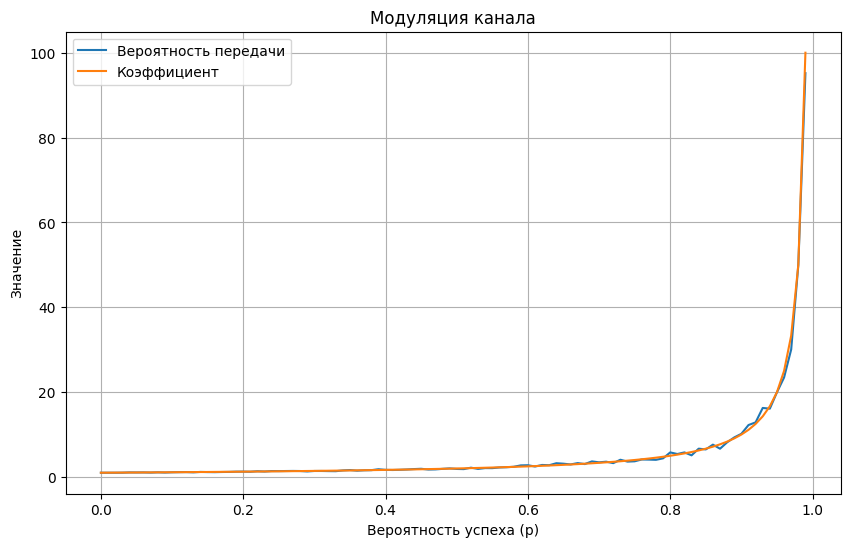

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Параметры канала
TAO = 0
DELTA_P = 0.01

# Переменные канала
p_s = []
koef = []
p_of_transmit = []

# Моделирование канала
for p in np.arange(0, 1, DELTA_P):
    counter = 0
    tries = 100
    for i in range(tries):
        tmp = 1
        while (np.random.random() < p):
            tmp += 1
        counter += tmp

    p_s.append(p)
    koef.append(1 / (1 - p))
    p_of_transmit.append(counter / tries)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_s, p_of_transmit, label='Вероятность передачи')
plt.plot(p_s, koef, label='Коэффициент')
plt.xlabel('Вероятность успеха (p)')
plt.ylabel('Значение')
plt.title('Модуляция канала')
plt.legend()
plt.grid(True)
plt.show()


### Нахождение среднего числа передач в алгоритме с ожиданием при ограниченном числе повторных передач

![image1.png](./assets/image1.png)

#### Расчет теоретического параметра среднего числа передач
![image2.png](./assets/image3.png)

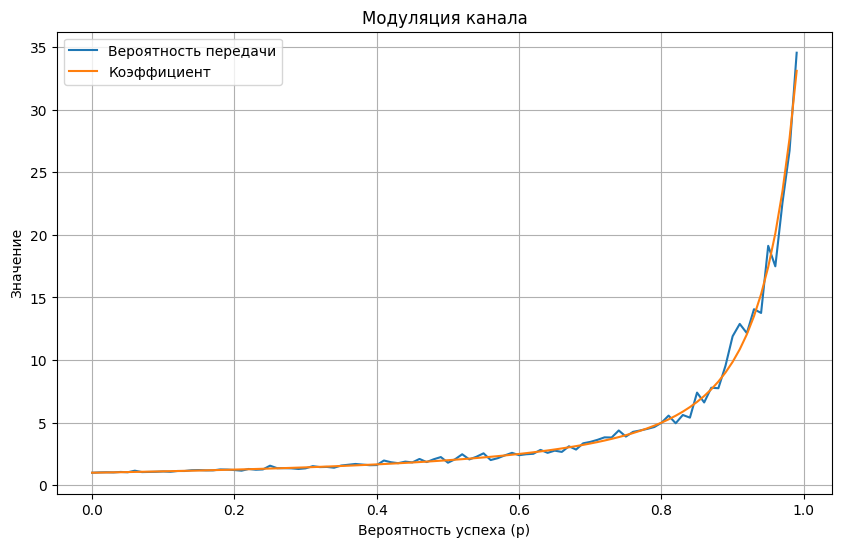

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Параметры канала
TAO = 0
DELTA_P = 0.01
MAX_TRIES = 40

# Переменные канала
p_s = []
koef = []
p_of_transmit = []

# Моделирование канала
for p in np.arange(0, 1, DELTA_P):
    counter = 0
    tries = 100
    for i in range(tries):
        tmp = 1
        while (np.random.random() < p):
            tmp += 1
            if tmp == MAX_TRIES:
                break
        counter += tmp

    p_s.append(p)
    koef.append((1-p**MAX_TRIES) / (1 - p))
    p_of_transmit.append(counter / tries)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_s, p_of_transmit, label='Вероятность передачи')
plt.plot(p_s, koef, label='Коэффициент')
plt.xlabel('Вероятность успеха (p)')
plt.ylabel('Значение')
plt.title('Модуляция канала')
plt.legend()
plt.grid(True)
plt.show()


### Нахождение среднего числа передач в алгоритме с ожиданием при наличии ошибок в обратном канале

![image1.png](./assets/image1.png)

#### Расчет теоретического параметра среднего числа передач
![image2.png](./assets/image4.png)

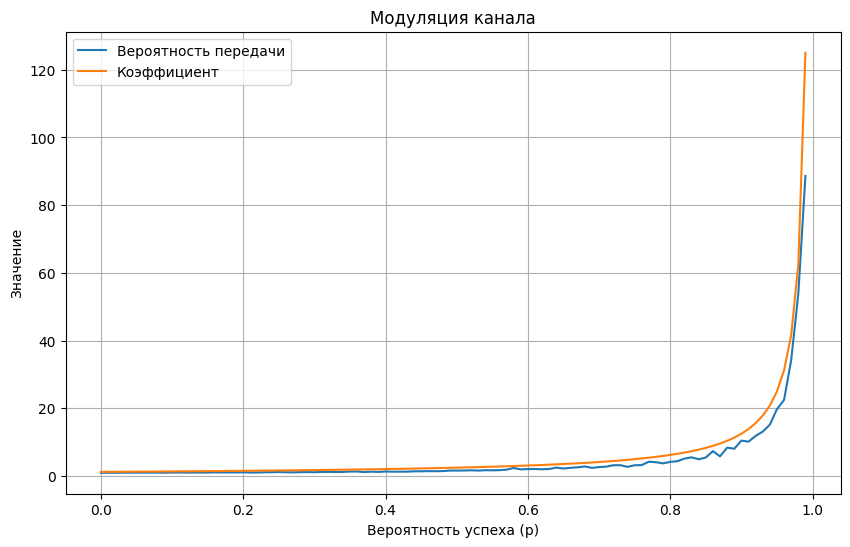

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Параметры канала
TAO = 0
DELTA_P = 0.01
MAX_TRIES = 40
P_rev = 0.2

# Переменные канала
p_s = []
koef = []
p_of_transmit = []

# Моделирование канала
for p in np.arange(0, 1, DELTA_P):
    counter = 0
    tries = 100
    steps = 0
    for i in range(tries):
        tmp = 1
        while (np.random.random() < p):

            if (np.random.random() < p) or (np.random.random() < P_rev):
                tmp += 1
            steps += 1
        counter += tmp

    p_s.append(p)
    koef.append(1 / ((1 - p)*(1 - P_rev)))
    p_of_transmit.append(counter / tries)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_s, p_of_transmit, label='Вероятность передачи')
plt.plot(p_s, koef, label='Коэффициент')
plt.xlabel('Вероятность успеха (p)')
plt.ylabel('Значение')
plt.title('Модуляция канала')
plt.legend()
plt.grid(True)
plt.show()


### Моделирование алгоритма с ожиданием для определения коэффициента использования канала при τ > 0

![image1.png](./assets/image1.png)

#### Расчет теоретического параметра среднего числа передач
![image5.png](./assets/image5.png)

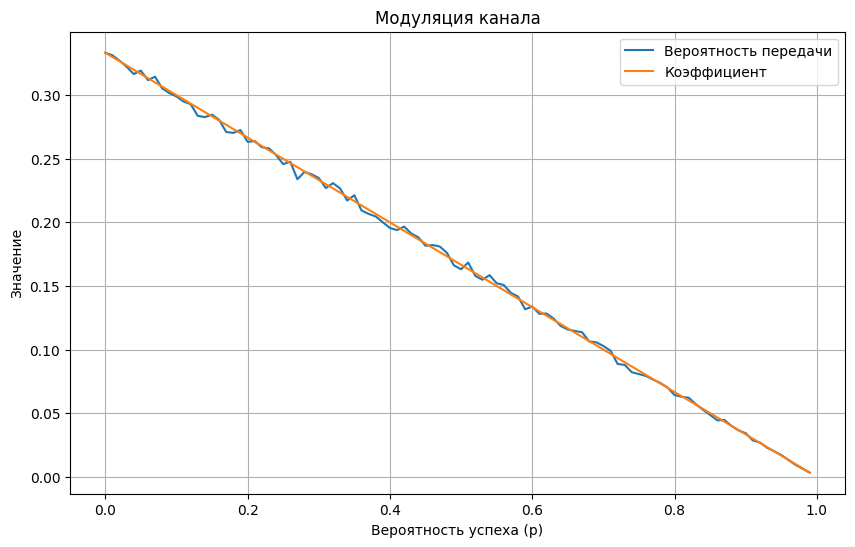

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Параметры канала
TAO = 2
MESSAGES = 1000
DELTA_P = 0.01
MAX_TRIES = 40
P_rev = 0.2

# Переменные канала
p_s = []
koef = []
p_of_transmit = []

# Моделирование канала
for p in np.arange(0, 1, DELTA_P):
    allTime = 0
    for i in range(MESSAGES):
        allTime += 1 + TAO
        while (True):
          if np.random.random() < p:
            allTime += (1 + TAO)
          else:
            break

    p_s.append(p)
    koef.append((1 - p) / (1 + TAO))
    p_of_transmit.append( MESSAGES / allTime )
# p_s.append(1)
# koef.append(0)
# p_of_transmit.append(0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_s, p_of_transmit, label='Вероятность передачи')
plt.plot(p_s, koef, label='Коэффициент')
plt.xlabel('Вероятность успеха (p)')
plt.ylabel('Значение')
plt.title('Модуляция канала')
plt.legend()
plt.grid(True)
plt.show()


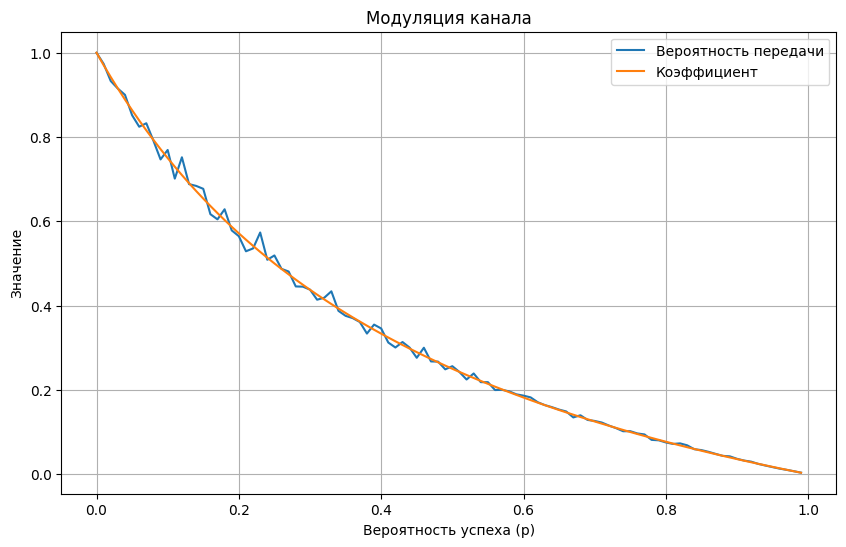

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Параметры канала
TAO = 2
MESSAGES = 1000
DELTA_P = 0.01
MAX_TRIES = 40
P_rev = 0.2

# Переменные канала
p_s = []
koef = []
p_of_transmit = []

# Моделирование канала
for p in np.arange(0, 1, DELTA_P):
    allTime = 0
    tmpCount = 0
    while tmpCount < MESSAGES:
      allTime += 1
      if np.random.random() < p:         
        allTime += TAO;
      else:
        tmpCount += 1     

    p_s.append(p)
    koef.append((1 - p) / (1 + p * TAO))
    p_of_transmit.append( MESSAGES / allTime )
# p_s.append(1)
# koef.append(0)
# p_of_transmit.append(0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_s, p_of_transmit, label='Вероятность передачи')
plt.plot(p_s, koef, label='Коэффициент')
plt.xlabel('Вероятность успеха (p)')
plt.ylabel('Значение')
plt.title('Модуляция канала')
plt.legend()
plt.grid(True)
plt.show()